In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
url = "http://stats.espncricinfo.com/ci/engine/player/34103.html?class=2;template=results;type=batting;view=innings"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

In [88]:
tables = soup.find_all("table")
# for i,table in enumerate(tables):
#    print(i,table)

column_names = []
for column in tables[3].find_all("tr")[0].find_all("th"):
    column_names.append(column.text)
print(column_names)

['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns', '', 'Opposition', 'Ground', 'Start Date', '']


In [89]:
def str_to_float(row_dict):
    for col in ["Mins", "BF", "4s", "6s", "SR", "Pos", "Inns"]:
        if row_dict[col] == "-":
            row_dict[col] = -1
        row_dict[col] = float(row_dict[col])
    return row_dict


vals = []
for i,row in enumerate(tables[3].find_all("tr")[1:]):
    row_dict = {col_name: 0 for col_name in column_names}
    for j,col in enumerate(row.find_all("td")):
        row_dict[column_names[j]] = col.text
    if not row_dict["Runs"] == "DNB" and not row_dict["Runs"] == "TDNB":
        if "*" in row_dict["Runs"]:
            row_dict["Notout"] = 1
            row_dict["Runs"] = float(row_dict["Runs"].replace("*",""))
            row_dict = str_to_float(row_dict)
        else:
            row_dict["Notout"] = 0
            row_dict["Runs"] = float(row_dict["Runs"])
            row_dict = str_to_float(row_dict)
        vals.append(row_dict)
df = pd.DataFrame(vals)
df

,,4s,6s,BF,Dismissal,Ground,Inns,Mins,Notout,Opposition,Pos,Runs,SR,Start Date
0,ODI # 125,0.0,0.0,10.0,bowled,Ahmedabad,1.0,-1.0,0,v England,2.0,0.0,0.00,25 Nov 1981
1,ODI # 131,3.0,0.0,30.0,lbw,Jalandhar,2.0,-1.0,0,v England,1.0,17.0,56.66,20 Dec 1981
2,ODI # 156,10.0,1.0,43.0,caught,Amritsar,1.0,-1.0,0,v Sri Lanka,2.0,57.0,132.55,12 Sep 1982
3,ODI # 157,13.0,1.0,66.0,caught,Delhi,2.0,-1.0,0,v Sri Lanka,2.0,95.0,143.93,15 Sep 1982
4,ODI # 159,-1.0,-1.0,83.0,bowled,Bengaluru,2.0,-1.0,0,v Sri Lanka,2.0,92.0,110.84,26 Sep 1982
5,ODI # 162,1.0,0.0,15.0,caught,Gujranwala,2.0,-1.0,0,v Pakistan,2.0,6.0,40.00,3 Dec 1982
6,ODI # 163,1.0,0.0,21.0,bowled,Multan,2.0,-1.0,0,v Pakistan,1.0,8.0,38.09,17 Dec 1982
7,ODI # 164,3.0,3.0,29.0,caught,Lahore,2.0,-1.0,0,v Pakistan,2.0,39.0,134.48,31 Dec 1982
8,ODI # 172,5.0,0.0,76.0,caught,Karachi,1.0,-1.0,0,v Pakistan,1.0,48.0,63.15,21 Jan 1983
9,ODI # 200,-1.0,-1.0,17.0,caught,Manchester,1.0,-1.0,0,v West Indies,2.0,14.0,82.35,9 Jun 1983


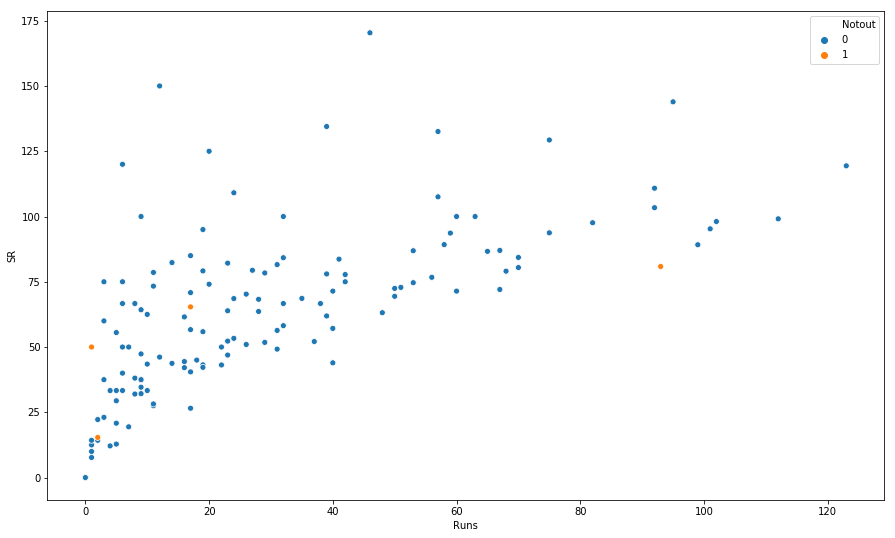

In [90]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=df, x="Runs", y="SR", hue="Notout",)

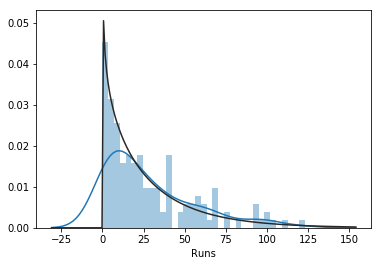

In [94]:
from scipy import stats
sns.distplot(df["Runs"], fit=stats.chi2, bins=35)

In [96]:
fit_result = stats.chi2.fit(df["Runs"])

In [99]:
fit_result

(1.6699622966216041, -9.103029092690246e-26, 16.479070010705748)